In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
%matplotlib inline

In [2]:
# read `email_table.csv`
email_table = pd.read_csv('../email/email_table.csv')
open1  = pd.read_csv('../email/email_opened_table.csv')
click1 = pd.read_csv('../email/link_clicked_table.csv')
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [3]:
# Create new variabes nd fill with 1
open1['open'] = 1
click1['click'] = 1

In [4]:
#check uniqueness of email_id in three tables
print('email_table.csv:\t', len(email_table['email_id'].unique()))
print('email_opened_table.csv:\t', len(open1['email_id'].unique()))
print('link_clicked_table.csv:\t', len(click1['email_id'].unique()))

email_table.csv:	 100000
email_opened_table.csv:	 10345
link_clicked_table.csv:	 2119


Merge Data

In [5]:
data = pd.merge(left=email_table, right=open1, how='left', on='email_id')
data = pd.merge(left=data, right=click1, how='left', on='email_id')
data = data.fillna(value=0)
data['open'] = data['open'].astype(int)
data['click'] = data['click'].astype(int)
data['flag'] = data.click > data.open
data['flag'] = data['flag'].astype(int)
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click,flag
0,85120,short_email,personalized,2,Sunday,US,5,0,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,0
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0,0


In [6]:
print('{0:25s} {1:>8.4f}%'.format('Opened user percentage:', data['open'].mean() * 100))
print('{0:25s} {1:>8.4f}%'.format('Clicked user percentage:', data['click'].mean() * 100))
print('{0:25s} {1:>8.4f}%'.format('Unusual activity:', data['flag'].mean() * 100))

Opened user percentage:    10.3450%
Clicked user percentage:    2.1190%
Unusual activity:           0.0500%


In [7]:
flg  = data[data.flag == 1]
data = data[data.flag == 0]

About 1 in 10 emails is opend and 2 in 100 eamils were clicked

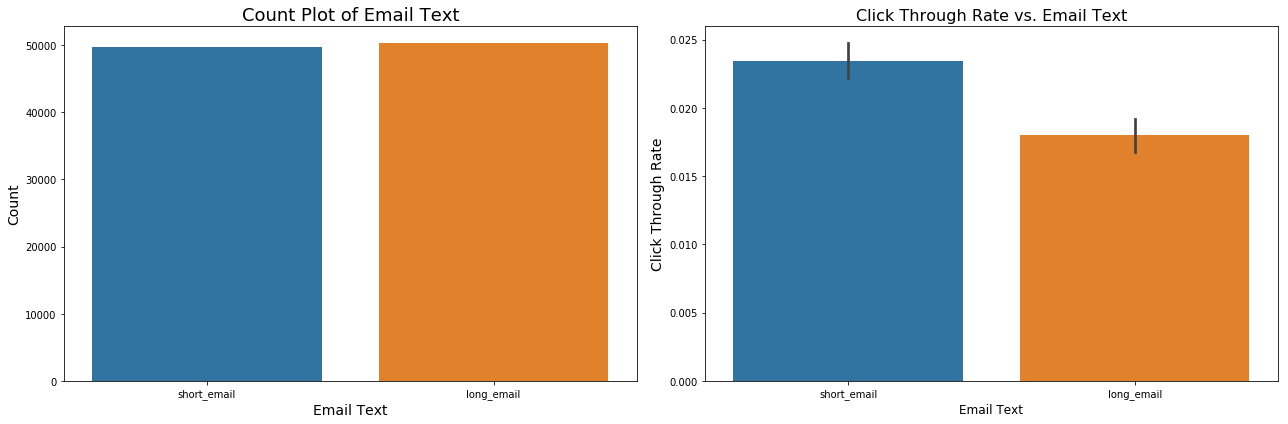

In [8]:
# Visulization: email text vs click 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='email_text', data=data, ax=ax[0])
ax[0].set_xlabel('Email Text', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_title('Count Plot of Email Text', fontsize=18)
sns.barplot(x='email_text', y='click', data=data, ax=ax[1])
ax[1].set_xlabel('Email Text', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=14)
ax[1].set_title('Click Through Rate vs. Email Text', fontsize=16)
plt.tight_layout()
plt.show()

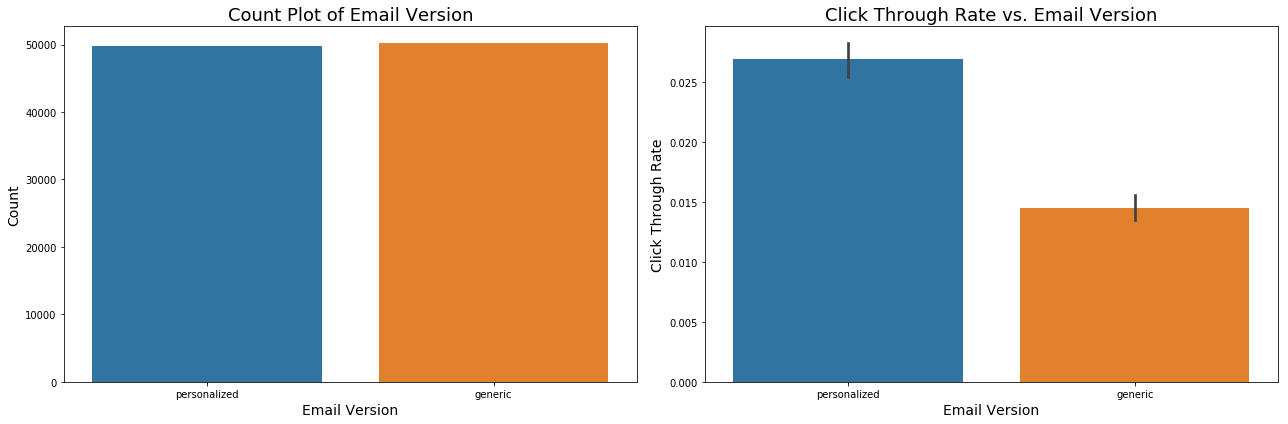

In [9]:
# Visulization: email version vs click 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='email_version', data=data, ax=ax[0])
ax[0].set_xlabel('Email Version', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_title('Count Plot of Email Version', fontsize=18)
sns.barplot(x='email_version', y='click', data=data, ax=ax[1])
ax[1].set_xlabel('Email Version', fontsize=14)
ax[1].set_ylabel('Click Through Rate', fontsize=14)
ax[1].set_title('Click Through Rate vs. Email Version', fontsize=18)
plt.tight_layout()
plt.show()

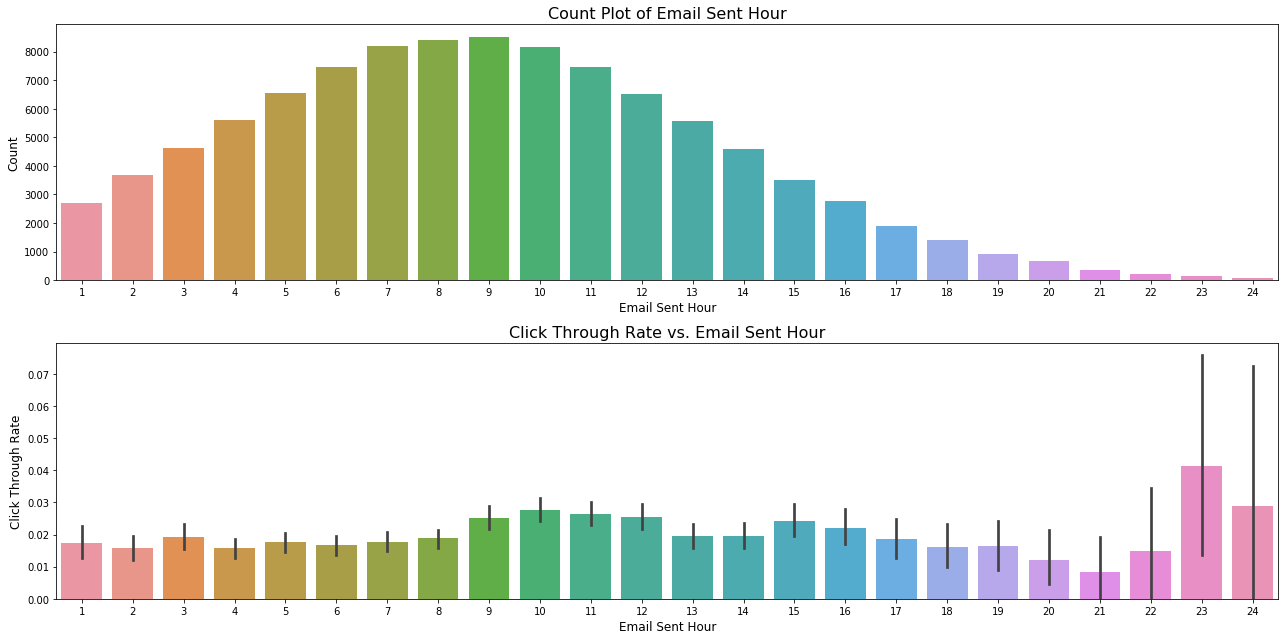

In [10]:
# Visulization: email hour vs click 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 9))
sns.countplot(x='hour', data=data, ax=ax[0])
ax[0].set_xlabel('Email Sent Hour', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Sent Hour', fontsize=16)
sns.barplot(x='hour', y='click', data=data, ax=ax[1])
ax[1].set_xlabel('Email Sent Hour', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Email Sent Hour', fontsize=16)
plt.tight_layout()
plt.show()

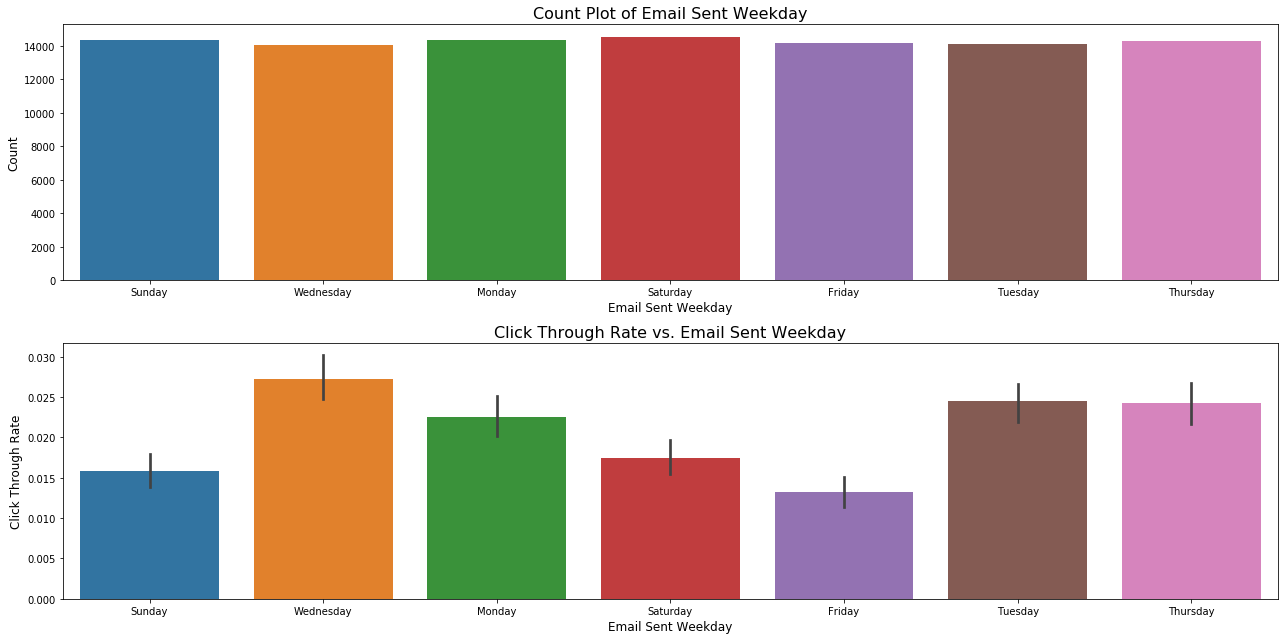

In [11]:
# Visulization: email weekday vs click 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 9))
sns.countplot(x='weekday', data=data, ax=ax[0])
ax[0].set_xlabel('Email Sent Weekday', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Sent Weekday', fontsize=16)
sns.barplot(x='weekday', y='click', data=data, ax=ax[1])
ax[1].set_xlabel('Email Sent Weekday', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Email Sent Weekday', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\clfee\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


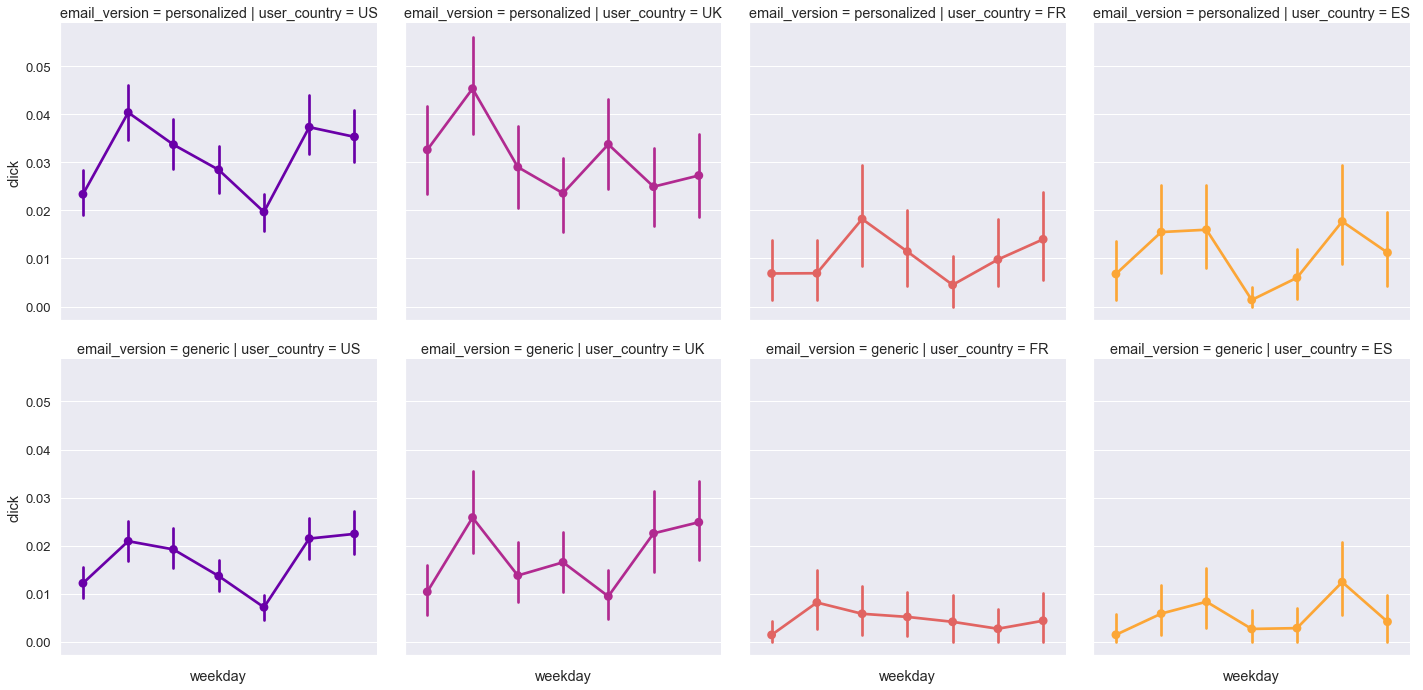

In [12]:
# Visulization: email country vs click, under week day 
sns.set(font_scale = 1.2)
g = sns.factorplot(data = data, x = 'weekday', y = 'click', 
               col = 'user_country', # per store type in cols
               palette = 'plasma',
               hue = 'user_country',
            row = 'email_version')
g.set_xticklabels(rotation=80)

C:\Users\clfee\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


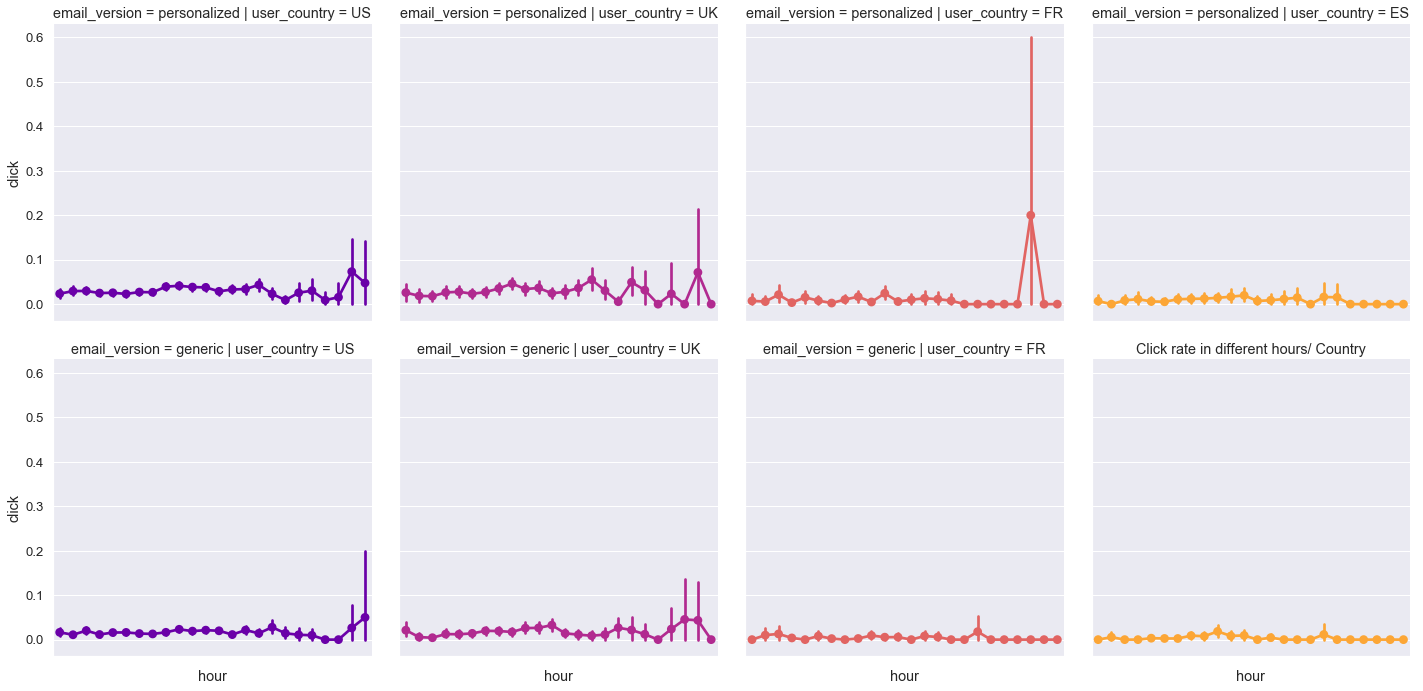

In [13]:
# Visulization: email country vs click, under hour 
sns.set(font_scale = 1.2)
fig = sns.factorplot(data = data, x = 'hour', y = 'click', 
               col = 'user_country', # per user country in cols
               palette = 'plasma',
               hue = 'user_country',
               row = 'email_version')
plt.xlabel("hour")
#g.set_axis_labels('Hour', 'Click')
fig.set_xticklabels(rotation=80)
plt.title("Click rate in different hours/ Country")
plt.show(fig)

In [14]:
# Initialize H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from C:\Users\clfee\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\clfee\AppData\Local\Temp\tmp3xjq5oj_
  JVM stdout: C:\Users\clfee\AppData\Local\Temp\tmp3xjq5oj_\h2o_clfee_started_from_python.out
  JVM stderr: C:\Users\clfee\AppData\Local\Temp\tmp3xjq5oj_\h2o_clfee_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,11 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,6 months and 20 days !!!
H2O cluster name:,H2O_from_python_clfee_zumwfn
H2O cluster total nodes:,1
H2O cluster free memory:,1.650 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


In [15]:
# Transform to H2O Frame, and make sure the target variable is categorical
h2o_df = H2OFrame(data)
h2o_df['click'] = h2o_df['click'].asfactor()
h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click,flag
type,int,enum,enum,int,enum,enum,int,int,enum,int
mins,8.0,,,1.0,,,0.0,0.0,,0.0
mean,498695.7290645299,,,9.059099549774928,,,3.878559279639822,0.10350175087543773,,0.0
maxs,999998.0,,,24.0,,,22.0,1.0,,0.0
sigma,289226.1152436017,,,4.439618361673161,,,3.196324441484254,0.3046146201448759,,0.0
zeros,0,,,0,,,13872,89605,,99950
missing,0,0,0,0,0,0,0,0,0,0
0,85120.0,short_email,personalized,2.0,Sunday,US,5.0,0.0,0,0.0
1,966622.0,long_email,personalized,12.0,Sunday,UK,2.0,1.0,1,0.0
2,777221.0,long_email,personalized,11.0,Wednesday,US,2.0,0.0,0,0.0


In [16]:
# Split into 75% training and 25% test dataset
strat_split = h2o_df['click'].stratified_split(test_frac=0.2, seed=42)
train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']
feature = ['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']
target = 'click'

In [79]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=150, max_depth=3,
mtries=-1, col_sample_rate_per_tree = 0.6,seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


<IPython.core.display.Javascript object>


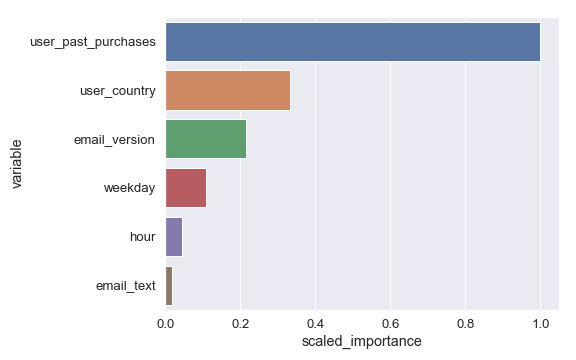

In [80]:
# Feature importance
importance = model.varimp(use_pandas=True)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.tight_layout()
plt.show()

In [81]:
# Make predictions
train_true = train.as_data_frame()['click'].values
test_true = test.as_data_frame()['click'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values
train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\clfee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\clfee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\clfee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19576
           1       0.00      0.00      0.00       414

   micro avg       0.98      0.98      0.98     19990
   macro avg       0.49      0.50      0.49     19990
weighted avg       0.96      0.98      0.97     19990



In [88]:
test_pred1 = test_pred > 0.03
test_pred1 = test_pred1.astype(int)

In [89]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_true, test_pred1)

array([[17976,  1600],
       [  300,   114]], dtype=int64)

<IPython.core.display.Javascript object>


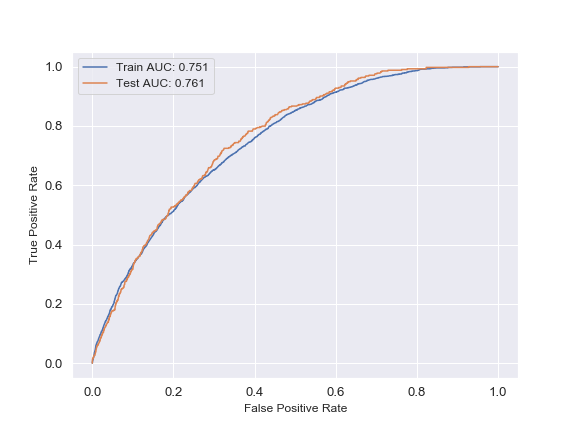

In [90]:
# ROC curves
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


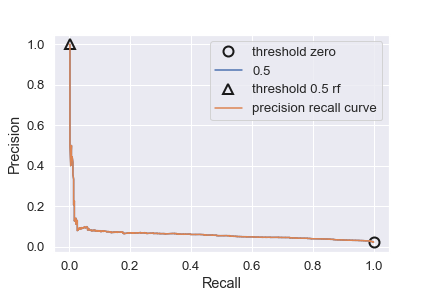

In [91]:
# Plot curve 
from sklearn.metrics import precision_recall_curve
%matplotlib notebook

precision, recall, thresholds = precision_recall_curve(test_true, test_pred)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(recall[close_zero],precision[close_zero],  'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(recall, precision, label="0.5")

close_default_rf = np.argmin(np.abs(thresholds - 0.5))
plt.plot(recall[close_default_rf], precision[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.plot(recall,precision,  label="precision recall curve")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="best")

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


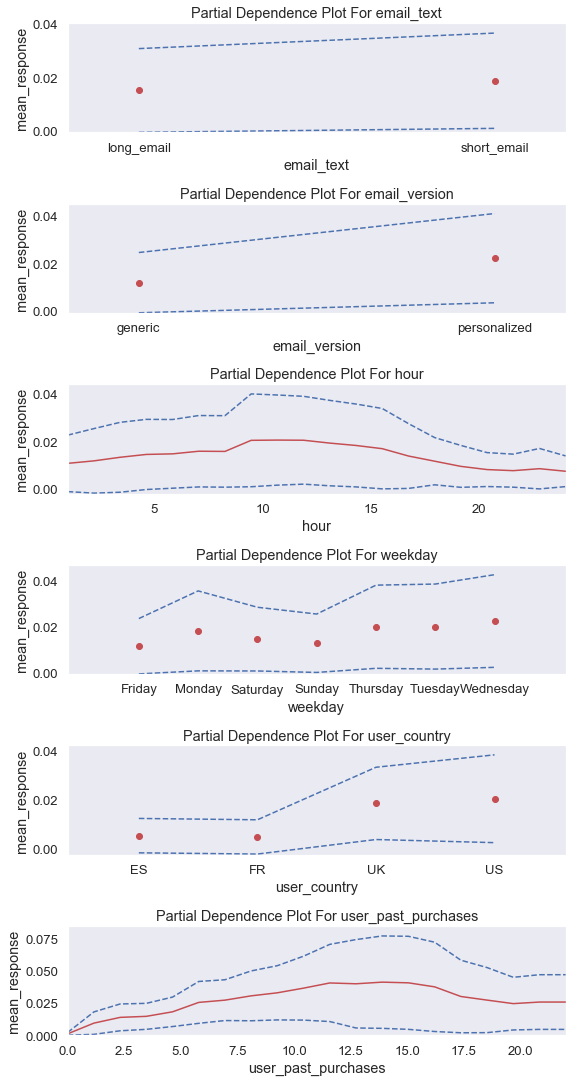

In [22]:
# Partial dependence plot
_ = model.partial_plot(train, cols=feature, figsize=(8, 15))

In [ ]:
h2o_drf_wrapper = h2o_predict_proba_wrapper(iris_drf,feature_names)

In [66]:

# save model to mojo and view it as an image
# R code sample and more information available here: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/productionizing.html#viewing-a-mojo-model
# another python example could be found here: https://dzone.com/articles/visualizing-h2o-gbm-and-random-forest-mojo-models

model = model.leader # the model that we want to plot it can be any h2o model as long as it's not a StackedEnsemble model
model_path = model.download_mojo(get_genmodel_jar=True)

# download h2o jar 
!wget -c http://h2o-release.s3.amazonaws.com/h2o/rel-xia/2/h2o-3.22.0.2.zip
!unzip -n h2o-3.22.0.2.zip 

!java -cp h2o-3.22.0.2/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i $model_path -o model.gv -f 20 -d 3
!dot -Tpng model.gv -o model.png

from IPython.display import display
from PIL import Image

# showing the image in notebook
display(Image.open('model.png'))

AttributeError: type object 'H2ORandomForestEstimator' has no attribute 'leader'